<a href="https://colab.research.google.com/github/ChandraShekhar162001/Amazon-review-analysis-/blob/main/Amaxon_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
np.random.seed(7) # seeding random number generator

df = pd.read_csv('amazon.csv')
print(df.head())

                     id  ... reviews.username
0  AVqkIhwDv8e3D1O-lebb  ...          Adapter
1  AVqkIhwDv8e3D1O-lebb  ...           truman
2  AVqkIhwDv8e3D1O-lebb  ...            DaveZ
3  AVqkIhwDv8e3D1O-lebb  ...           Shacks
4  AVqkIhwDv8e3D1O-lebb  ...        explore42

[5 rows x 21 columns]


In [3]:
data = df.copy()
data.describe()

,reviews.didPurchase,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,0.0,0.0,1157.000000,1157.000000,0.0,0.0
mean,NaN,NaN,0.278306,4.587727,NaN,NaN
std,NaN,NaN,2.944467,0.707318,NaN,NaN
min,NaN,NaN,0.000000,1.000000,NaN,NaN
25%,NaN,NaN,0.000000,4.000000,NaN,NaN
50%,NaN,NaN,0.000000,5.000000,NaN,NaN
75%,NaN,NaN,0.000000,5.000000,NaN,NaN
max,NaN,NaN,62.000000,5.000000,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1157 non-null   object 
 1   name                  1157 non-null   object 
 2   asins                 1157 non-null   object 
 3   brand                 1157 non-null   object 
 4   categories            1157 non-null   object 
 5   keys                  1157 non-null   object 
 6   manufacturer          1157 non-null   object 
 7   reviews.date          1157 non-null   object 
 8   reviews.dateAdded     1157 non-null   object 
 9   reviews.dateSeen      1157 non-null   object 
 10  reviews.didPurchase   0 non-null      float64
 11  reviews.doRecommend   1157 non-null   bool   
 12  reviews.id            0 non-null      float64
 13  reviews.numHelpful    1157 non-null   int64  
 14  reviews.rating        1157 non-null   int64  
 15  reviews.sourceURLs   

In [5]:
data["asins"].unique()

array(['B01AHB9CN2'], dtype=object)

In [9]:
asins_unique=len(data["asins"].unique())
print("Number of Unique ASINS:"+str(asins_unique))

Number of Unique ASINS:1


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
dataAfter = data.dropna(subset=["reviews.rating"])
# Removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)

split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter,
                                           dataAfter["reviews.rating"]):
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

Before 1157
After 1157


In [16]:
print(len(strat_train))
print(len(strat_test))
print(strat_test["reviews.rating"].value_counts()/len(strat_test))

925
232
5    0.668103
4    0.284483
3    0.021552
2    0.012931
1    0.012931
Name: reviews.rating, dtype: float64


In [17]:
reviews = strat_train.copy()
reviews.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
860,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-03-15T00:00:00.000Z,2017-05-21T05:55:38Z,"2017-04-30T00:42:00.000Z,2017-06-07T09:03:00.000Z",NaN,True,NaN,0,5,http://reviews.bestbuy.com/3545/5620406/review...,"I traded this in after receiving a 7"" at Chris...",Love it,NaN,NaN,Sandy
1021,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-02-15T00:00:00.000Z,2017-05-21T05:55:57Z,"2017-04-30T00:42:00.000Z,2017-06-07T09:04:00.000Z",NaN,True,NaN,0,4,http://reviews.bestbuy.com/3545/5620406/review...,"purchased for my sister for reading books, int...",perfect for first time user,NaN,NaN,rkfb
701,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-04-01T00:00:00.000Z,2017-05-21T05:55:25Z,"2017-04-30T00:41:00.000Z,2017-06-07T09:03:00.000Z",NaN,True,NaN,0,4,http://reviews.bestbuy.com/3545/5620406/review...,Bought this for my wife and she loves it! This...,Good for price,NaN,NaN,Lefty
576,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2016-10-29T00:00:00.000Z,2017-05-21T05:51:36Z,"2017-04-30T00:39:00.000Z,2017-06-07T09:00:00.000Z",NaN,True,NaN,0,5,http://reviews.bestbuy.com/3545/5620406/review...,The new Fire HD 8 is an improvement over the F...,Great Replacement for my Kindle Fire HD 7,NaN,NaN,GrannyL
596,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2016-10-25T00:00:00.000Z,2017-05-21T05:51:37Z,"2017-04-30T00:39:00.000Z,2017-06-07T09:00:00.000Z",NaN,True,NaN,2,4,http://reviews.bestbuy.com/3545/5620406/review...,Very descent for a non-IPAD. Good speakers. Gr...,Very descent,NaN,NaN,GvilleGuy


In [18]:
print(len(reviews["name"].unique()), len(reviews["asins"].unique()))
print(reviews.info())
print(reviews.groupby("asins")["name"].unique())

1 1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 925 entries, 860 to 456
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    925 non-null    object 
 1   name                  925 non-null    object 
 2   asins                 925 non-null    object 
 3   brand                 925 non-null    object 
 4   categories            925 non-null    object 
 5   keys                  925 non-null    object 
 6   manufacturer          925 non-null    object 
 7   reviews.date          925 non-null    object 
 8   reviews.dateAdded     925 non-null    object 
 9   reviews.dateSeen      925 non-null    object 
 10  reviews.didPurchase   0 non-null      float64
 11  reviews.doRecommend   925 non-null    bool   
 12  reviews.id            0 non-null      float64
 13  reviews.numHelpful    925 non-null    int64  
 14  reviews.rating        925 non-null    int64  
 15  reviews.sourceURL

In [20]:
different_names = reviews[reviews["asins"] ==
                          "B00L9EPT8O,B01E6AO69U"]["name"].unique()
for name in different_names:
    print(name)
print(reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].value_counts())

Series([], Name: name, dtype: int64)


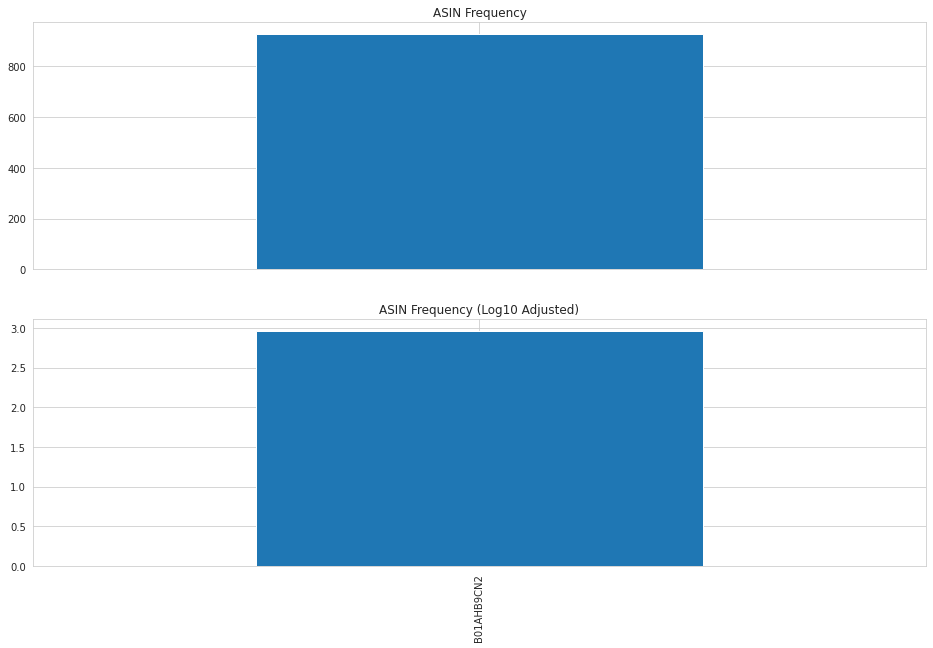

In [21]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2,
                                               title="ASIN Frequency (Log10 Adjusted)")
plt.show()

4.589189189189189


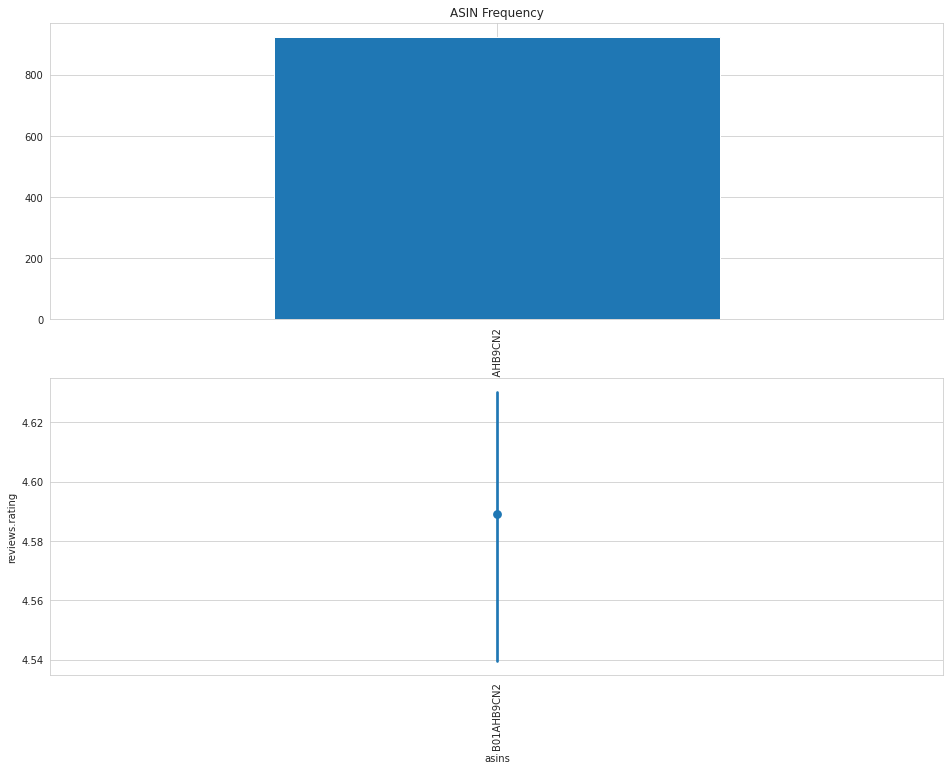

In [22]:
print(reviews["reviews.rating"].mean())

asins_count_ix = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

In [23]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["reviews.rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["reviews.rating"].apply(sentiments)
print(strat_train["Sentiment"][:20])

860     Positive
1021    Positive
701     Positive
576     Positive
596     Positive
897     Positive
1025    Positive
1135    Positive
69      Positive
794     Positive
300     Positive
1145    Positive
1132    Positive
358     Positive
888     Positive
270     Positive
146     Positive
282     Positive
1156    Positive
565     Positive
Name: Sentiment, dtype: object
